In [1]:
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#### Заниматься разведовательным анализом данных для временных рядов - непростая задача

Генерировать фичи - трудно, простые метрики малоинформативны и напрямую в модельке использовать их сложно. Но давайте попробуем что-нибудь посчитать, а потом и посмотреть.

In [73]:
tickers = ['AAPL', 'MSFT']

In [3]:
data_ticker = yf.Ticker(tickers[0])

In [4]:
data = data_ticker.history(period = 'max')
data_ts = data['Close'][-10575//4:]
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.099874,0.100308,0.099874,0.099874,469033600,0.0,0.0
1980-12-15,0.095098,0.095098,0.094663,0.094663,175884800,0.0,0.0
1980-12-16,0.088149,0.088149,0.087715,0.087715,105728000,0.0,0.0
1980-12-17,0.089886,0.090320,0.089886,0.089886,86441600,0.0,0.0
1980-12-18,0.092492,0.092926,0.092492,0.092492,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-14,148.970001,150.279999,147.429993,148.279999,73374100,0.0,0.0
2022-11-15,152.220001,153.589996,148.559998,150.039993,89868300,0.0,0.0
2022-11-16,149.130005,149.869995,147.289993,148.789993,64218300,0.0,0.0


Основная фича в временном ряде - временной ряд. Давайте посмотрим на динамику цен компании Apple.

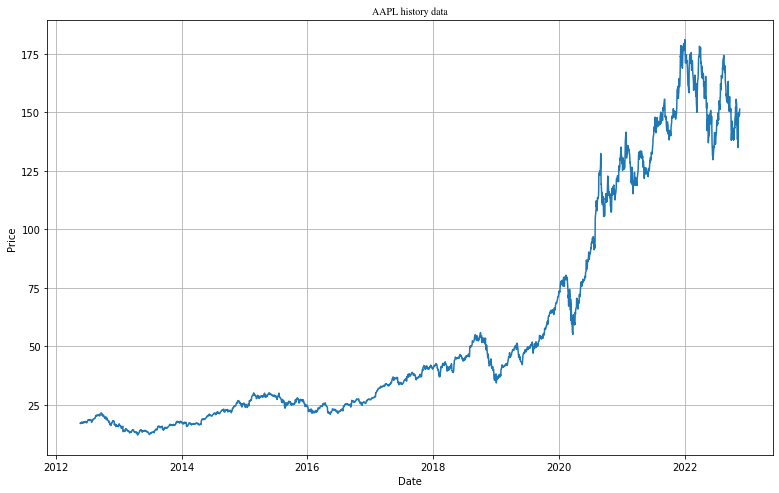

In [5]:
plt.figure(figsize = (13, 8))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('AAPL history data', font = 'Times')
plt.grid()
plt.plot(data_ts)
plt.show()

Видно, что волатильность цены акций в течение 10 лет была разной, давайте посмотрим, как вела себя годовая волатильность в течение последних 10 лет.

In [6]:
volatility = []
for ind in range(256, len(data_ts)):
    volatility.append(np.array(data_ts[ind-256:ind]).std())

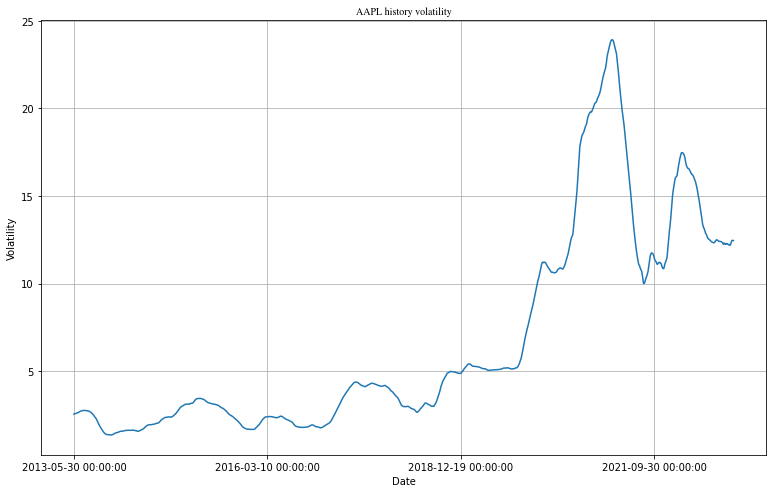

In [7]:
plt.figure(figsize = (13, 8))
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.xticks(np.arange(2388)[::700], data_ts.index[256::700])

plt.title('AAPL history volatility', font = 'Times')
plt.grid()
plt.plot(volatility)
plt.show() 

Давайте посмотрим на распределение значения волатильности за последние 10 лет.

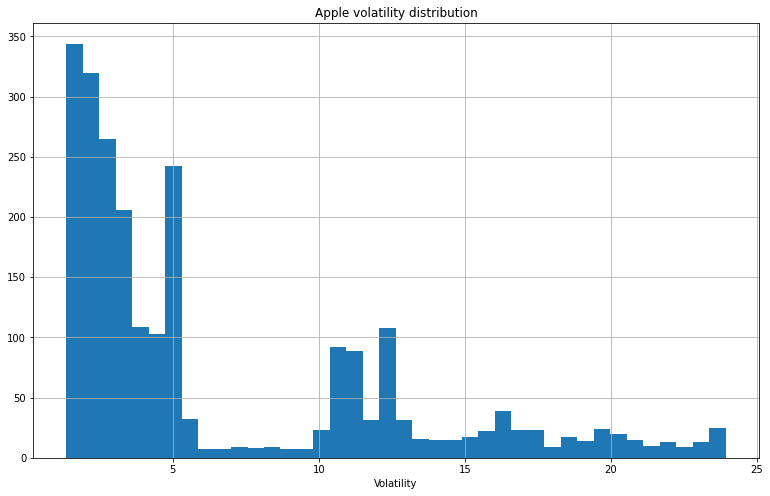

In [8]:
plt.figure(figsize = (13, 8))
plt.hist(volatility, bins = 40)
plt.title('Apple volatility distribution')
plt.xlabel('Volatility')
plt.grid()
plt.show()

Теперь посмотрим на значение доходности цены акции при горизонте инвестирования в один год.

In [9]:
annual_profit = []
for i in range(256, len(data_ts)):
    annual_profit.append(data_ts[i]/data_ts[i-256] - 1)

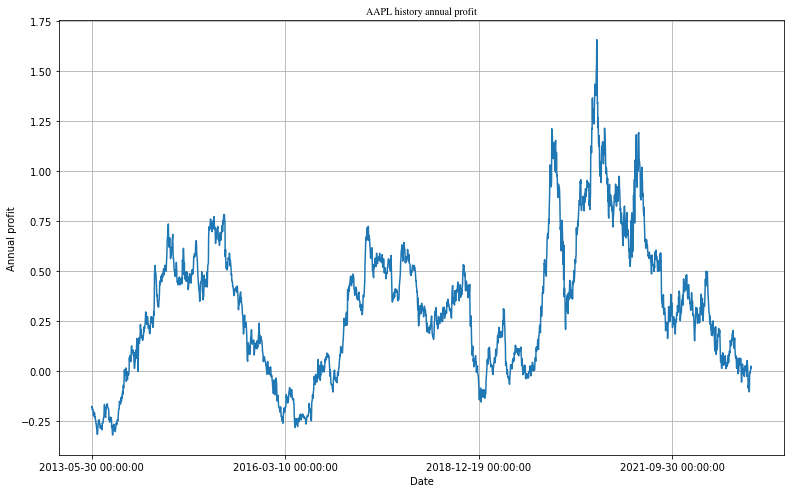

In [10]:
plt.figure(figsize = (13, 8))
plt.ylabel('Annual profit')
plt.xlabel('Date')
plt.xticks(np.arange(2388)[::700], data_ts.index[256::700])

plt.title('AAPL history annual profit', font = 'Times')
plt.grid()
plt.plot(annual_profit)
plt.show() 

Посмотрим на среднюю годовую доходность.

In [11]:
np.array(annual_profit).mean()

0.3178721405281908

Теперь посмотрим на значение доходности цены акции при горизонте инвестирования в три года.

In [12]:
three_year_profit = []
for i in range(256*3, len(data_ts)):
    three_year_profit.append(data_ts[i]/data_ts[i-256*3] - 1)

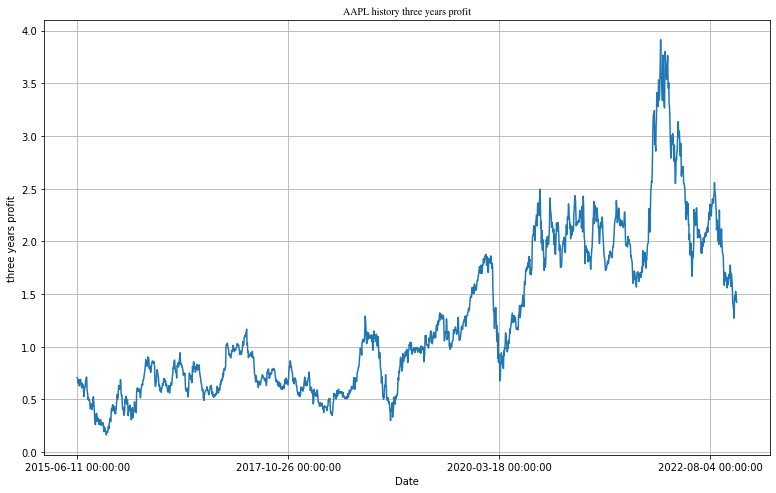

In [13]:
plt.figure(figsize = (13, 8))
plt.ylabel('three years profit')
plt.xlabel('Date')
plt.xticks(np.arange(len(three_year_profit))[::600], data_ts.index[256*3::600])

plt.title('AAPL history three years profit', font = 'Times')
plt.grid()
plt.plot(three_year_profit)
plt.show() 

Посмотрим на среднюю трехгодовую доходность.

In [14]:
np.array(three_year_profit).mean()

1.2536001614123604

Давайте посмотрим еще раз на график годовой доходности.

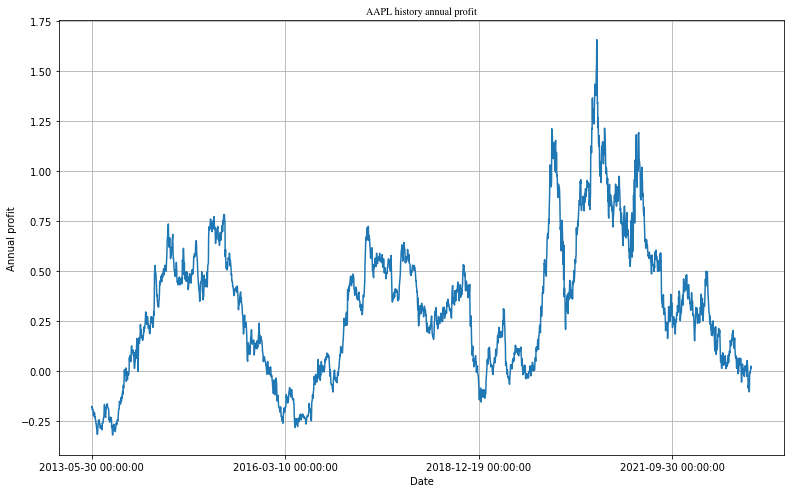

In [15]:
plt.figure(figsize = (13, 8))
plt.ylabel('Annual profit')
plt.xlabel('Date')
plt.xticks(np.arange(2388)[::700], data_ts.index[256::700])

plt.title('AAPL history annual profit', font = 'Times')
plt.grid()
plt.plot(annual_profit)
plt.show() 

Очень похоже на какой-то полином. Давайте попробуем найти коэффициенты этого полинома.

In [56]:
x = []
for j in range(2388):
    i = j/2388
    x.append([i, i**2, i**3, i**4, i**5, i**6, i**7, i**8])
x = np.array(x)
y = annual_profit

In [57]:
model = LinearRegression()

In [58]:
model.fit(np.array(x), y)

LinearRegression()

In [59]:
pred = model.predict(x)

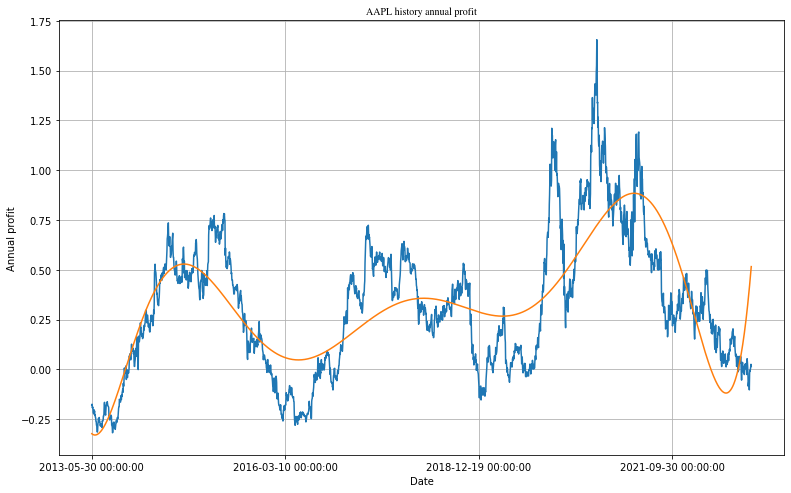

In [60]:
plt.figure(figsize = (13, 8))
plt.ylabel('Annual profit')
plt.xlabel('Date')
plt.xticks(np.arange(2388)[::700], data_ts.index[256::700])

plt.title('AAPL history annual profit', font = 'Times')
plt.grid()
plt.plot(annual_profit)
plt.plot(pred)
plt.show() 

Посмотрим еще на следующие фичи

Пусть имели ряд 
$\;ts_i$\;, сделем ряд $\;a_i = ts_{i+1} - ts_i$

In [61]:
diff_ts = []
for i in range(1, len(data_ts)):
    diff_ts.append(data_ts[i] - data_ts[i-1])

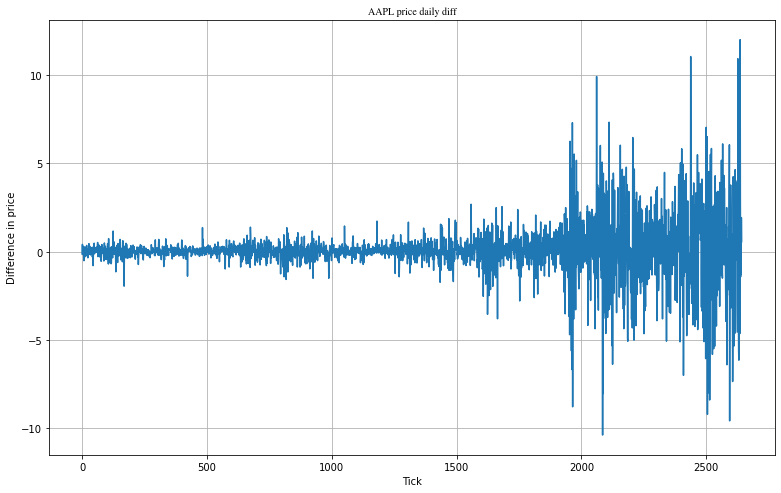

In [63]:
plt.figure(figsize = (13, 8))
plt.ylabel('Difference in price')
plt.xlabel('Tick')

plt.title('AAPL price daily diff', font = 'Times')
plt.grid()
plt.plot(diff_ts)
plt.show() 

Посмотрим на сандартное отклонение и среднее данной фичи

In [64]:
np.array(diff_ts).std()

1.5129773582615462

In [65]:
np.array(diff_ts).mean()

0.050776645084515334

Посмотрим теперь на следующие фичи

Пусть имели ряд 
$\;ts_i$\;, сделем ряд $\;a_i = \frac{ts_{i+1}}{ts_i}$

In [69]:
frac_ts = []
for i in range(1, len(data_ts)):
    frac_ts.append(data_ts[i]/data_ts[i-1])

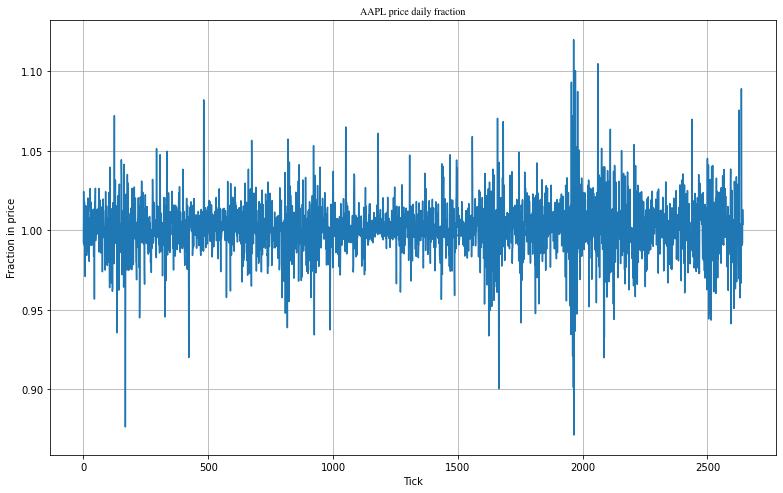

In [70]:
plt.figure(figsize = (13, 8))
plt.ylabel('Fraction in price')
plt.xlabel('Tick')

plt.title('AAPL price daily fraction', font = 'Times')
plt.grid()
plt.plot(frac_ts)
plt.show() 

In [71]:
np.array(frac_ts).std()

0.018237927853993925

In [72]:
np.array(frac_ts).mean()

1.000992138729396

Видно,что в среднем цена акции в следующий день больше, чем в предыдущий

Возьмем теперь еще вторую компанию

In [74]:
msft_ticker = yf.Ticker(tickers[1])

In [77]:
msft = msft_ticker.history(period = 'max')
msft_ts = msft['Close'][-2388:]
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055380,0.063524,0.055380,0.060809,1031788800,0.00,0.0
1986-03-14,0.060809,0.064067,0.060809,0.062980,308160000,0.00,0.0
1986-03-17,0.062980,0.064610,0.062980,0.064067,133171200,0.00,0.0
1986-03-18,0.064067,0.064609,0.061894,0.062437,67766400,0.00,0.0
1986-03-19,0.062437,0.062980,0.060809,0.061351,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2022-11-14,241.309951,243.224554,238.537765,240.871185,31123300,0.00,0.0
2022-11-15,244.969641,246.305872,239.355458,241.290009,31390100,0.00,0.0
2022-11-16,242.789993,243.800003,240.419998,241.729996,24093300,0.68,0.0


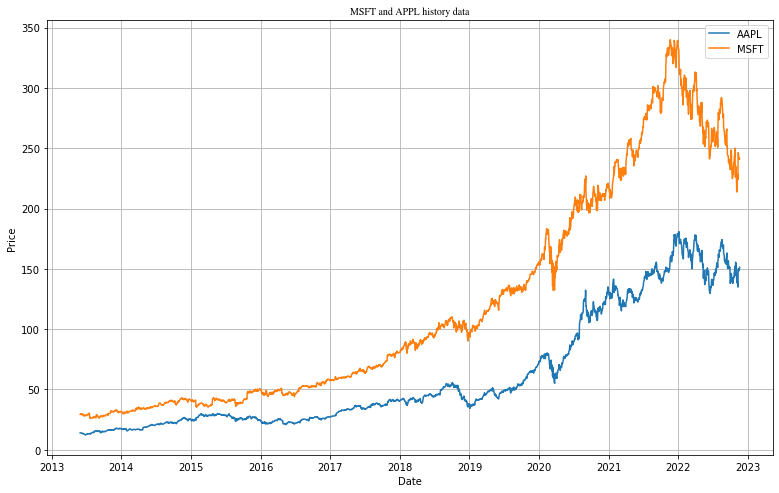

In [86]:
plt.figure(figsize = (13, 8))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('MSFT and APPL history data', font = 'Times')
plt.grid()
plt.plot(data_ts[-len(msft_ts):], label = 'AAPL')
plt.plot(msft_ts, label = 'MSFT')
plt.legend()
plt.show()

Заметим, что цены акций ведут себя схожим образом. Рассмотрим корреляцию Пиросна между рядами.

In [89]:
np.corrcoef(data_ts[-len(msft_ts):], msft_ts)[0][1]

0.9823456141136967

Все описанное выше можно опиисать как пайплайн первичного разведовательного анализа данных в нашей задаче. Также, все предложенные выше параметры можно считать новыми фичами, которые будут применяться при обучении алгоритмов машинного обучения.